In [1]:
import os, shutil
os.listdir('./data/cats_vs_dogs')

['train']

# preparing dataset

In [2]:
original_datset_dir = './data/cats_vs_dogs/train'

base_dir = './data/cats_vs_dogs_small'
#os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)


#train dataset
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

#validation dataset
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

#test dataset
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [8]:
'''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(original_datset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
'''

"\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames :\n    src = os.path.join(original_datset_dir, fname)\n    dst = os.path.join(train_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \nfnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]\nfor fname in fnames :\n    src = os.path.join(original_datset_dir, fname)\n    dst = os.path.join(validation_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \nfnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]\nfor fname in fnames :\n    src = os.path.join(original_datset_dir, fname)\n    dst = os.path.join(test_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \nfnames = ['dog.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames :\n    src = os.path.join(original_datset_dir, fname)\n    dst = os.path.join(train_dogs_dir, fname)\n    shutil.copyfile(src, dst)\n    \nfnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]\nfor fname in fnames :\n    src = os.path.join(original_dats

In [4]:
print('the number of train cat images : ', len(os.listdir(train_cats_dir)))
print('the number of train dog images : ', len(os.listdir(train_dogs_dir)))

print('the number of validation cat images : ', len(os.listdir(validation_cats_dir)))
print('the number of validation dog images : ', len(os.listdir(validation_dogs_dir)))

print('the number of test cat images : ', len(os.listdir(test_cats_dir)))
print('the number of test dog images : ', len(os.listdir(test_cats_dir)))

the number of train cat images :  1000
the number of train dog images :  1000
the number of validation cat images :  500
the number of validation dog images :  500
the number of test cat images :  500
the number of test dog images :  500


# CNN
## prepare network

In [5]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

- 특성맵의 깊이는 네트워크에서 점진적으로 증가하지만, 특성 맵의 크기는 감소한다. CNN에서 전형적인 패턴
- binary classification -> using sigmoid return probabiltiy

In [6]:
from keras import optimizers
from keras.utils.training_utils import multi_gpu_model

In [35]:
model = multi_gpu_model(model, gpus=2) #multi gpu
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

# image data preprocessing

1. read image files
2. jpeg -> RGA (decoding)
3. float type
4. 0-255 -> 0-1

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, #target directory
                                                   target_size = (150,150), batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator :
    print('batch data size : ', data_batch.shape)
    print('batch label size : ', labels_batch.shape)
    break #infinte loop

batch data size :  (20, 150, 150, 3)
batch label size :  (20,)


## fitting

In [42]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs = 30,
                             validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 90ms/step - loss: 0.4927 - acc: 0.7515 - val_loss: 0.5531 - val_acc: 0.7180
Epoch 2/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4740 - acc: 0.7665 - val_loss: 0.6713 - val_acc: 0.6620
Epoch 3/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4337 - acc: 0.7990 - val_loss: 0.5415 - val_acc: 0.7130
Epoch 4/30
100/100 [==============================] - 8s 85ms/step - loss: 0.4233 - acc: 0.8050 - val_loss: 0.5495 - val_acc: 0.7100
Epoch 5/30
100/100 [==============================] - 9s 85ms/step - loss: 0.3969 - acc: 0.8240 - val_loss: 0.5758 - val_acc: 0.7210
Epoch 6/30
100/100 [==============================] - 9s 86ms/step - loss: 0.3722 - acc: 0.8350 - val_loss: 0.5377 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 8s 84ms/step - loss: 0.3492 - acc: 0.8475 - val_loss: 0.5544 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 8s 84ms/step - 

## plot

In [10]:
import matplotlib.pyplot as plt

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

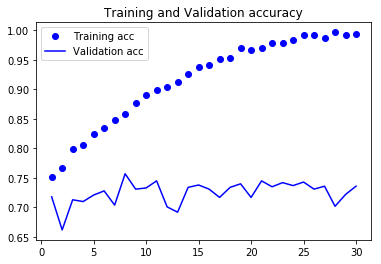

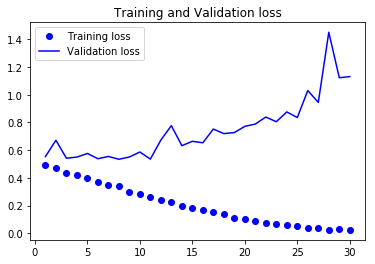

In [48]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

overfitting

# Image Augmentation

- 데이터 증식은 기존 훈련 샘프로부터 더 많은 훈련 데이터를 생성하는 방법

In [12]:
datagen = ImageDataGenerator(rotation_range=20, #회전시킬 각도 범위 (0~180)
                             width_shift_range=0.1, height_shift_range=0.1, #사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위(전체 너비와 높이에 대한 비율)
                            shear_range=0.1, #y축 방향으로 각도를 증가시켜 이미지를 변형
                            zoom_range=0.1, #랜덤하게 사진을 확대할 범위
                            horizontal_flip=True,#랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 있을 때 사용!(표지판 x, 인물/풍경 o)
                            fill_mode='nearest')

In [13]:
from keras.preprocessing import image

In [13]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)] )

img_path = fnames[3] #증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150))

In [14]:
x = image.img_to_array(img) #(150,150,3)
x = x.reshape((1,) + x.shape) #(1,150,150,3)

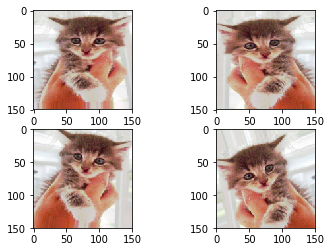

In [18]:
i = 0

for batch in datagen.flow(x, batch_size = 1) :
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    
    if i == 4 :
        break
        
plt.show()

## dropout
- autmentation을 이용하면 기존 정보의 재조합만 가능
- 과대적합을 제거하기에 충분하지 않을 수 있다
- 오버피팅을 억제하기 위해 완전 연결 분류기 직전에 dropout층 추가

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,
                                  width_shift_range= 0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) #test 데이터는 절대 증식되어서는 안 된다!!

train_generator = train_datagen.flow_from_directory(
                        train_dir, target_size = (150,150), #image size
                        batch_size = 32, class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                        train_dir, target_size = (150,150), #image size
                        batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
import tensorflow as tf
import keras.backend.tensorflow_backend as K

In [16]:
def get_session(gpu_fraction=0.3):

    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')

    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
                        gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))

    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

 

K.set_session(get_session())

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model = multi_gpu_model(model, gpus=2)
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics= ['acc'])


history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 100,
                         validation_data = validation_generator, validation_steps = 50)


Epoch 1/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6917 - acc: 0.5200 - val_loss: 0.6762 - val_acc: 0.6019
Epoch 2/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6781 - acc: 0.5700 - val_loss: 0.6512 - val_acc: 0.6048
Epoch 3/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6599 - acc: 0.6041 - val_loss: 0.6230 - val_acc: 0.6667
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6540 - acc: 0.6147 - val_loss: 0.6249 - val_acc: 0.6244
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6281 - acc: 0.6441 - val_loss: 0.7272 - val_acc: 0.5687
Epoch 6/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6157 - acc: 0.6675 - val_loss: 0.5709 - val_acc: 0.6926
Epoch 7/100
100/100 [==============================] - 20s 201ms/step - loss: 0.5996 - acc: 0.6881 - val_loss: 0.5468 - val_acc: 0.7172
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 20s 202ms/step - loss: 0.4011 - acc: 0.8137 - val_loss: 0.3426 - val_acc: 0.8479
Epoch 62/100
100/100 [==============================] - 20s 203ms/step - loss: 0.3958 - acc: 0.8150 - val_loss: 0.3004 - val_acc: 0.8775
Epoch 63/100
100/100 [==============================] - 20s 200ms/step - loss: 0.4134 - acc: 0.8125 - val_loss: 0.3285 - val_acc: 0.8516
Epoch 64/100
100/100 [==============================] - 20s 203ms/step - loss: 0.4005 - acc: 0.8172 - val_loss: 0.2955 - val_acc: 0.8706
Epoch 65/100
100/100 [==============================] - 20s 201ms/step - loss: 0.4054 - acc: 0.8091 - val_loss: 0.3045 - val_acc: 0.8744
Epoch 66/100
100/100 [==============================] - 20s 202ms/step - loss: 0.4018 - acc: 0.8138 - val_loss: 0.2896 - val_acc: 0.8920
Epoch 67/100
100/100 [==============================] - 20s 202ms/step - loss: 0.3943 - acc: 0.8216 - val_loss: 0.3788 - val_acc: 0.8194
Epoch 68/100
100/100 [===================

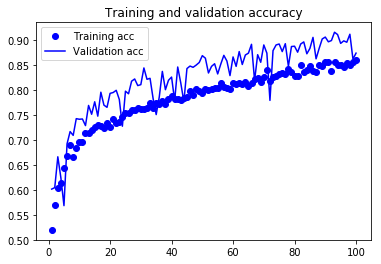

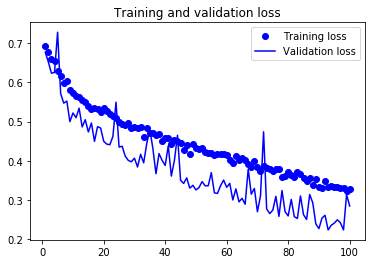

In [20]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
import numpy as np

In [24]:
np.argmax(val_acc)

92

In [25]:
np.argmin(val_loss)

92